## 연습문제 Day 1

- 2021년 한국프로야구 타자 스탯 데이터를 읽고, 기술통계 분석과 데이터 시각화를 실행합니다.
- url : https://bit.ly/KBO_Hitters_2021 (인코딩방식: EUC-KR)

### 실습 데이터셋 준비

URL을 읽고 데이터프레임을 생성합니다.

In [6]:
# 관련 라이브러리를 호출합니다.
import os
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels import robust
import joblib

In [7]:
# 온라인으로 공유 중인 csv 파일 주소를 URL에 할당합니다.
URL = 'https://bit.ly/KBO_Hitters_2021'

In [8]:
# URL을 읽고 데이터프레임 kbo를 생성합니다.
# [힌트] pd.read_csv() 함수를 사용하세요.
kbo = pd.read_csv(URL, encoding='EUC-KR')

In [9]:
# kbo의 정보를 확인합니다.
# [힌트] info() 함수를 사용하세요.
kbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     300 non-null    object 
 1   팀명      300 non-null    object 
 2   경기      300 non-null    int64  
 3   타석      300 non-null    int64  
 4   타수      300 non-null    int64  
 5   안타      300 non-null    int64  
 6   홈런      300 non-null    int64  
 7   득점      300 non-null    int64  
 8   타점      300 non-null    int64  
 9   볼넷      300 non-null    int64  
 10  삼진      300 non-null    int64  
 11  도루      300 non-null    int64  
 12  BABIP   300 non-null    object 
 13  타율      300 non-null    float64
 14  출루율     300 non-null    float64
 15  장타율     300 non-null    float64
 16  OPS     300 non-null    float64
 17  wOBA    300 non-null    float64
 18  WAR     300 non-null    float64
dtypes: float64(6), int64(10), object(3)
memory usage: 44.7+ KB


In [10]:
# kbo의 처음 5행을 출력합니다.
# [힌트] head() 함수를 사용하세요.
# [참고] n 매개변수에 출력할 행 개수를 정수로 지정합니다.(기본값: 5)
kbo.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
0,홍창기,LG,144,651,524,172,4,103,52,109,95,23,0.393,0.328,0.456,0.408,0.864,0.412,7.10
1,이정후,Hero,123,544,464,167,7,78,84,62,37,10,0.373,0.360,0.438,0.522,0.960,0.429,7.06
2,강백호,KT,142,628,516,179,16,76,102,104,85,10,0.385,0.347,0.451,0.521,0.972,0.434,6.97
3,최정,SSG,134,555,436,121,35,92,100,84,102,8,0.277,0.278,0.410,0.562,0.972,0.425,6.83
4,양의지,NC,141,570,480,156,30,81,111,69,60,2,0.315,0.325,0.414,0.581,0.995,0.432,6.48


### 데이터 전처리

열별 자료형을 알맞은 형태로 변환하고, 범주형 변수 올스타를 생성합니다.

In [11]:
# kbo의 열별 자료형을 출력합니다.
# [힌트] dtypes 속성을 사용하세요.
kbo.dtypes

선수명       object
팀명        object
경기         int64
타석         int64
타수         int64
안타         int64
홈런         int64
득점         int64
타점         int64
볼넷         int64
삼진         int64
도루         int64
BABIP     object
타율       float64
출루율      float64
장타율      float64
OPS      float64
wOBA     float64
WAR      float64
dtype: object

In [14]:
# kbo를 BABIP 기준으로 내림차순 정렬하고 마지막 10행을 출력합니다.
# [힌트] sort_values()와 tail() 함수를 사용하세요.
kbo.sort_values(by=['BABIP'], ascending=False).tail(n=10)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
259,박정음,Hero,70,18,14,0,0,19,1,2,3,4,0.0,0.0,0.167,0.0,0.167,0.13,-0.36
216,고명준,SSG,3,5,5,0,0,0,0,0,3,0,0.0,0.0,0.000,0.0,0.000,0.00,-0.16
280,이성곤,삼성,2,2,2,0,0,0,0,0,1,0,0.0,0.0,0.000,0.0,0.000,0.00,-0.55
267,정진기,SSG,2,7,7,0,0,0,0,0,2,0,0.0,0.0,0.000,0.0,0.000,0.00,-0.41
171,오장한,NC,1,1,1,0,0,0,0,0,1,0,-,0.0,0.000,0.0,0.000,0.00,-0.03
174,박성재,두산,1,1,1,0,0,0,0,0,1,0,-,0.0,0.000,0.0,0.000,0.00,-0.03
173,최종은,롯데,1,1,1,0,0,0,0,0,1,0,-,0.0,0.000,0.0,0.000,0.00,-0.03
165,황경태,두산,1,1,1,0,0,0,0,0,1,0,-,0.0,0.000,0.0,0.000,0.00,-0.03
166,나원탁,롯데,1,1,1,0,0,0,0,0,1,0,-,0.0,0.000,0.0,0.000,0.00,-0.03
170,서진용(타),SSG,1,1,1,0,0,0,0,0,1,0,-,0.0,0.000,0.0,0.000,0.00,-0.03


In [15]:
# BABIP의 원소가 '-'이면 '0'으로 변경합니다.
# [힌트] str.replace() 함수를 사용하세요.
# [주의] 패턴(pat)과 교체(repl) 매개변수에 반드시 문자열로 지정해야 합니다!
kbo['BABIP'] = kbo['BABIP'].str.replace(pat='-', repl='0')

In [19]:
# BABIP을 실수형으로 변환합니다.
# [힌트] astype() 함수를 사용하세요.
kbo['BABIP'] = kbo['BABIP'].astype(float)

In [20]:
# '두산', '롯데', '삼성', 'SSG', 'KT'를 원소로 갖는 리스트 dream을 생성합니다.
dream = ['두산', '롯데', '삼성', 'SSG', 'KT']

In [24]:
# 팀명이 dream의 원소이면 True, 아니면 False인 부울형 시리즈 locs를 생성합니다.
# [힌트] isin() 함수를 사용하세요.
locs = kbo['팀명'].isin(values=dream)

In [25]:
kbo.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
0,홍창기,LG,144,651,524,172,4,103,52,109,95,23,0.393,0.328,0.456,0.408,0.864,0.412,7.10
1,이정후,Hero,123,544,464,167,7,78,84,62,37,10,0.373,0.360,0.438,0.522,0.960,0.429,7.06
2,강백호,KT,142,628,516,179,16,76,102,104,85,10,0.385,0.347,0.451,0.521,0.972,0.434,6.97
3,최정,SSG,134,555,436,121,35,92,100,84,102,8,0.277,0.278,0.410,0.562,0.972,0.425,6.83
4,양의지,NC,141,570,480,156,30,81,111,69,60,2,0.315,0.325,0.414,0.581,0.995,0.432,6.48


In [22]:
# locs를 출력합니다.
locs

0      False
1      False
2       True
3       True
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Name: 팀명, Length: 300, dtype: bool

In [27]:
# locs에서 True의 개수를 출력합니다.
# [힌트] sum() 함수를 사용하세요.
locs.sum()

141

In [33]:
# locs가 True일 때 '드림', False일 때 '나눔'을 원소로 갖는 열을 생성합니다.
# 새 열이름을 올스타로 지정하세요.
# [힌트] np.where() 함수를 사용하세요.
kbo['올스타'] = np.where(locs, '드림', '나눔')

In [34]:
kbo.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,올스타
0,홍창기,LG,144,651,524,172,4,103,52,109,95,23,0.393,0.328,0.456,0.408,0.864,0.412,7.10,나눔
1,이정후,Hero,123,544,464,167,7,78,84,62,37,10,0.373,0.360,0.438,0.522,0.960,0.429,7.06,나눔
2,강백호,KT,142,628,516,179,16,76,102,104,85,10,0.385,0.347,0.451,0.521,0.972,0.434,6.97,드림
3,최정,SSG,134,555,436,121,35,92,100,84,102,8,0.277,0.278,0.410,0.562,0.972,0.425,6.83,드림
4,양의지,NC,141,570,480,156,30,81,111,69,60,2,0.315,0.325,0.414,0.581,0.995,0.432,6.48,나눔


In [35]:
# 올스타의 범주별 빈도수를 출력합니다.
# [힌트] value_counts() 함수를 사용하세요.
kbo['올스타'].value_counts()

나눔    159
드림    141
Name: 올스타, dtype: int64

### 데이터 시각화

OPS의 히스토그램과 상자 수염 그림을 그려서 분포를 확인하고, <br>
실수형 변수와 산점도를 그려서 직선의 관계가 있는지 확인합니다.<br>
범주형 변수와 상자 수염 그림을 그려서 평균의 차이가 있는지 확인합니다.

In [38]:
import sys

In [39]:
sys.path

['D:\\python\\PythonAdvanced-main\\exercise',
 'C:\\Program Files\\python\\python310.zip',
 'C:\\Program Files\\python\\DLLs',
 'C:\\Program Files\\python\\lib',
 'C:\\Program Files\\python',
 '',
 'C:\\Program Files\\python\\lib\\site-packages',
 'C:\\Program Files\\python\\lib\\site-packages\\win32',
 'C:\\Program Files\\python\\lib\\site-packages\\win32\\lib',
 'C:\\Program Files\\python\\lib\\site-packages\\Pythonwin']

In [44]:
# 시각화 관련 모듈을 호출합니다.
from GraphicSetting import *
import HelloDataScience as hds

In [45]:
# sequential, diverging, qualitative(번주형 변수에 적합)
sns.choose_colorbrewer_palette(data_type='qualitative')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

In [46]:
# 기본 팔레트를 'Set1'으로 설정합니다.
# [힌트] sns.set_palette() 함수를 사용하세요.
sns.set_palette(palette = 'Set1', n_colors = 9)

In [42]:
# 기본 팔레트 색을 출력합니다.
# [힌트] sns.color_palette() 함수를 사용하세요.
sns.color_palette()

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [49]:
# 타석의 최솟값과 최댓값을 확인합니다.
# [힌트] describe() 함수 실행 결과에서 최솟값과 최댓값을 인덱싱하세요.
kbo['타석'].describe()[['min','max']]

min      1.0
max    668.0
Name: 타석, dtype: float64

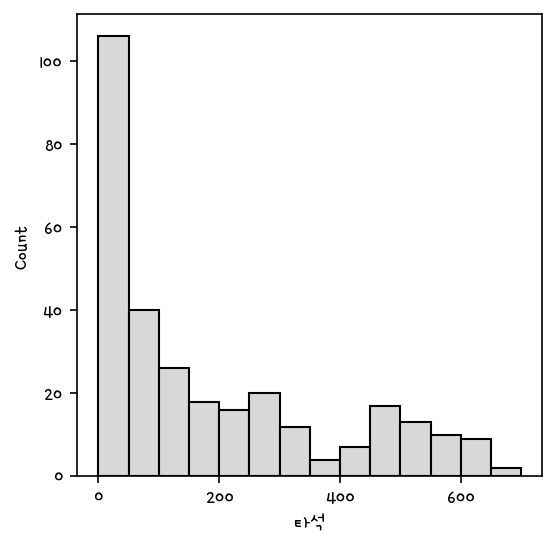

In [52]:
# 타석으로 히스토그램을 그립니다.
# [힌트] sns.histplot() 함수를 사용하세요.
# binwidth 매개변수에 막대 너비를 50으로 지정합니다.
# binrange 매개변수를 막대 경계의 시작을 0, 끝을 700으로 지정합니다.
sns.histplot(data=kbo, x='타석', binwidth=50, binrange=(0,700), color='0.8');

In [55]:
# kbo에서 타석이 50 이상인 행을 선택하고 kbo에 재할당합니다.
# [힌트] ge() 함수를 사용하세요.
kbo = kbo[kbo['타석'].ge(50)]

In [57]:
# kbo의 행 개수를 출력합니다.
# [힌트] shape 속성 결과에 0번 인덱스 원소를 선택하세요.
kbo.shape[0]

194

In [58]:
# OPS의 최솟값과 최댓값을 확인합니다.
# [힌트] describe() 함수 실행 결과에서 최솟값과 최댓값을 인덱싱하세요.
kbo['OPS'].describe()[['min','max']]

min    0.399
max    1.091
Name: OPS, dtype: float64

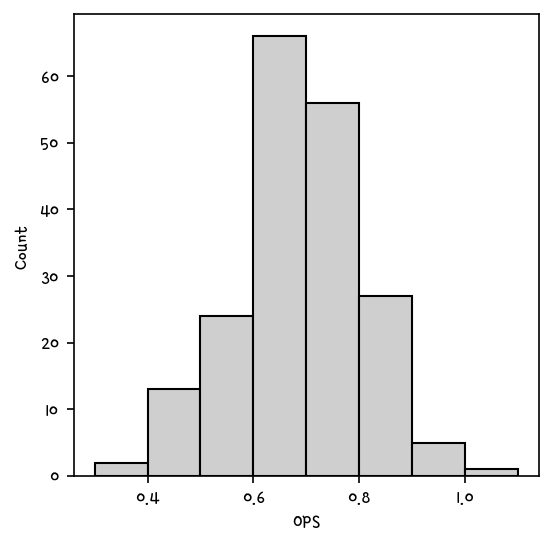

In [61]:
# OPS로 히스토그램을 그립니다.
# [힌트] sns.histplot() 함수를 사용하세요.
# binwidth 매개변수에 막대 너비를 0.1로 지정하세요.
# binrange 매개변수를 막대 경계의 시작을 0.3, 끝을 1.1로 지정하세요.
sns.histplot(data=kbo, x='OPS', binwidth=0.1, binrange=(0.3, 1.1), color='silver');

<AxesSubplot:ylabel='OPS'>

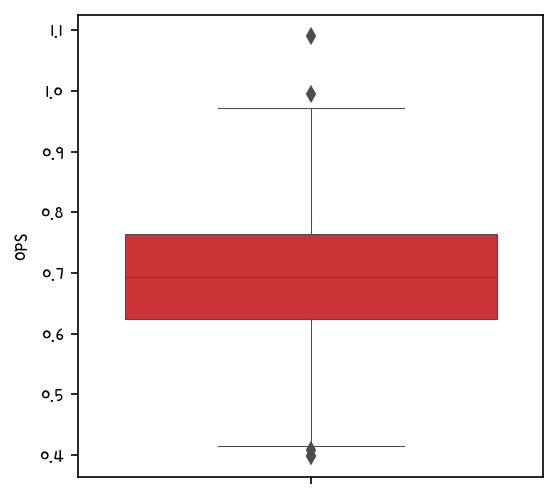

In [63]:
# OPS로 상자 수염 그림을 세워서 그립니다.
# [힌트] sns.boxplot() 함수를 사용하세요.
sns.boxplot(data=kbo, y='OPS')

In [64]:
kbo.dtypes

선수명       object
팀명        object
경기         int64
타석         int64
타수         int64
안타         int64
홈런         int64
득점         int64
타점         int64
볼넷         int64
삼진         int64
도루         int64
BABIP    float64
타율       float64
출루율      float64
장타율      float64
OPS      float64
wOBA     float64
WAR      float64
올스타       object
dtype: object

In [67]:
# kbo에서 열별 자료형이 실수형이면 True, 아니면 False인 시리즈 locs를 생성합니다.
# [힌트] eq() 함수를 사용하세요.
locs = kbo.dtypes.eq('float64')
locs

선수명      False
팀명       False
경기       False
타석       False
타수       False
안타       False
홈런       False
득점       False
타점       False
볼넷       False
삼진       False
도루       False
BABIP     True
타율        True
출루율       True
장타율       True
OPS       True
wOBA      True
WAR       True
올스타      False
dtype: bool

In [68]:
# kbo에서 실수형 변수만 선택합니다.
# [힌트] loc 인덱서를 추가하고 열 위치에 locs를 지정하세요.
kbo.loc[:,locs]

,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
0,0.393,0.328,0.456,0.408,0.864,0.412,7.10
1,0.373,0.360,0.438,0.522,0.960,0.429,7.06
2,0.385,0.347,0.451,0.521,0.972,0.434,6.97
3,0.277,0.278,0.410,0.562,0.972,0.425,6.83
4,0.315,0.325,0.414,0.581,0.995,0.432,6.48
...,...,...,...,...,...,...,...
295,0.311,0.239,0.275,0.321,0.596,0.270,-0.76
296,0.198,0.158,0.248,0.254,0.502,0.241,-0.90
297,0.264,0.175,0.238,0.228,0.466,0.224,-0.96
298,0.217,0.143,0.218,0.224,0.442,0.213,-0.96


In [69]:
# kbo에서 열별 자료형이 실수형인 열이름을 출력합니다.
# [힌트] 위 코드 실행 결과에서 열이름을 출력하세요.
kbo.loc[:,locs].columns

Index(['BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR'], dtype='object')

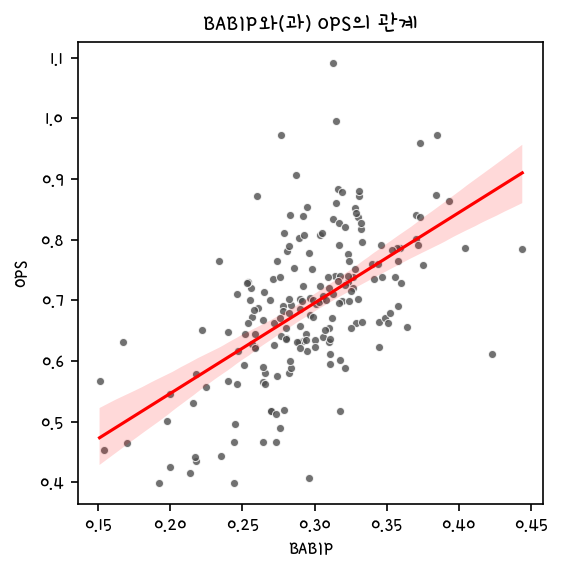

In [70]:
# BABIP과 OPS의 산점도를 그립니다.
# [힌트] hds.plot_regression() 함수를 사용하세요.
hds.plot_regression(data = kbo, x = 'BABIP', y = 'OPS')

In [ ]:
# 타율과 OPS의 산점도를 그립니다.
# [힌트] hds.plot_regression() 함수를 사용하세요.
hds.plot_regression()

In [ ]:
# 출루율과 OPS의 산점도를 그립니다.
# [힌트] hds.plot_regression() 함수를 사용하세요.
hds.plot_regression()

In [ ]:
# 장타율과 OPS의 산점도를 그립니다.
# [힌트] hds.plot_regression() 함수를 사용하세요.
hds.plot_regression()

In [ ]:
# wOBA와 OPS의 산점도를 그립니다.
# [힌트] hds.plot_regression() 함수를 사용하세요.
hds.plot_regression()

In [ ]:
# WAR과 OPS의 산점도를 그립니다.
# [힌트] hds.plot_regression() 함수를 사용하세요.
hds.plot_regression()

In [73]:
# 올스타의 범주별 OPS의 분포를 비교합니다.
# [힌트] hds.plot_box_group() 함수를 사용하세요.
hds.plot_box_group()

TypeError: plot_box_group() missing 3 required positional arguments: 'data', 'x', and 'y'

### 기술통계 분석

변수별 대푯값(중심)과 산포(흩어진 정도)를 다양한 기술통계량으로 확인합니다.

In [ ]:
# OPS의 평균을 출력합니다.
# [힌트] mean() 함수를 사용하세요.
kbo['OPS'].

In [ ]:
# OPS의 5% 절사평균을 출력합니다.
# [힌트] stats.trim_mean() 함수를 사용하세요.
stats.trim_mean()

In [ ]:
# OPS의 중위수를 출력합니다.
# [힌트] median() 함수를 사용하세요.
kbo['OPS'].

In [ ]:
# 팀명의 최빈값을 출력합니다.
# [힌트] mode() 함수를 사용하세요.
kbo['팀명'].

In [ ]:
# OPS의 범위를 출력합니다.
# [힌트] quantile()과 diff() 함수를 차례대로 사용하세요.
# diff() 함수 실행 결과에서 마지막 원소를 인덱싱하세요.
kbo['OPS'].

In [ ]:
# OPS의 사분범위를 출력합니다.
# [힌트] quantile()과 diff() 함수를 차례대로 사용하세요.
# diff() 함수 실행 결과에서 마지막 원소를 인덱싱하세요.
kbo['OPS'].

In [ ]:
# OPS의 분산을 출력합니다.
# [힌트] var() 함수를 사용하세요.
kbo['OPS'].

In [ ]:
# OPS의 표준편차를 출력합니다.
# [힌트] std() 함수를 사용하세요.
kbo['OPS'].

In [ ]:
# OPS의 중위수절대편차를 출력합니다.
# [힌트] robust.mad() 함수를 사용하세요.
robust.mad()

### z 파일로 저장

In [ ]:
# 현재 작업 경로를 확인합니다.
# [힌트] getcwd() 함수를 사용하세요.
os.

In [ ]:
# data 폴더로 작업 경로를 변경합니다.
# [힌트] chdir() 함수를 사용하세요.
os.

In [ ]:
# kbo를 'KBO_Hitter_2021.z'로 저장합니다.
# [힌트] joblib.dump() 함수를 사용하세요.
joblib.dump()

In [ ]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
# [힌트] listdir() 함수를 사용하세요.
os.

## End of Document